In [19]:
import os

import joblib
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from matplotlib.patches import Patch

models_dir = "./models"
print(f"Models reside in: {models_dir}")

Models reside in: ./models


In [20]:
model_50_path = os.path.join(models_dir, "rbm_w_vanilla_20_50.pkl")
model_1000_path = os.path.join(models_dir, "rbm_w_vanilla_20_1000.pkl")
model_20000_path = os.path.join(models_dir, "rbm_w_vanilla_20_20000.pkl")

model_50 = joblib.load(model_50_path)
model_1000 = joblib.load(model_1000_path)
model_20000 = joblib.load(model_20000_path)

In [16]:
def sample_rbm(rbm, n_fantasy=10_000, n_gibbs=200):
    v = np.random.rand(n_fantasy, rbm.n_features_in_) > 0.5
    for _ in range(n_gibbs):
        v = rbm.gibbs(v)
    return v.astype(int)


model_50_samples = sample_rbm(model_50)
model_1000_samples = sample_rbm(model_1000)
model_20000_samples = sample_rbm(model_20000)

freqs = {
    50:    model_50_samples.mean(0),
    1000:  model_1000_samples.mean(0),
    20000: model_20000_samples.mean(0)
}

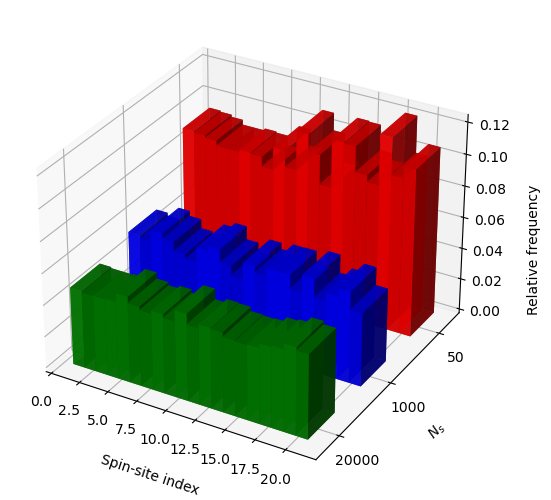

In [22]:
chain_length = freqs[50].shape[0]
xs = np.arange(1, chain_length+1)
Ns_list     = [20000, 1000, 50]
y_positions = np.arange(len(Ns_list))
dy, dx      = 0.5, 1.0
colors      = {50:'red', 1000:'blue', 20000:'green'}

fig = plt.figure(figsize=(8,6))
ax  = fig.add_subplot(111, projection='3d')

for i, ns in enumerate(Ns_list):
    zs     = freqs[ns]
    ys_pos = np.full_like(xs, y_positions[i])
    ax.bar3d(
        xs, ys_pos - dy/2, np.zeros_like(zs),
        dx, dy, zs,
        color=colors[ns], alpha=0.8
    )

# labels & ticks
ax.set_xlabel('Spin‐site index', labelpad=10)
ax.set_ylabel('$N_s$',           labelpad=10)
ax.set_yticks(y_positions)
ax.set_yticklabels(Ns_list)

# margins & external z‐label
fig.subplots_adjust(left=0.10, right=0.75, bottom=0.10, top=0.90)
fig.text(0.78, 0.50, 'Relative frequency', rotation=90,
         va='center', ha='center')

plt.show()